# Scraping Glassdoor jobs ads

You are fleshly graduated, and one of your first resolutions after school is, if you didn't already get one, to find a job in the next few months. This is usually not so complicated to do if you apply in the field of your diploma majors, and some web-appplications or calling some relatives might do the trick. But what if you realize your field of studies, while interesing, does not lead to jobs if which you could see yourself working ? 

In that case, you begin to look at job ads in the areas you would really like to work, and figure out there are some skills you need to acquire in order to fit the job. But you want to optimize your time and only learn the most important of them. How to know which are the most relevant skills for a given job ? The answer: analyze a big number of job ads.

### What this notebook is about

The following presents the means to scraping Glassdoor job ads and gathering information about the skills that are required for a given type of job. It also includes some data visualizations.

More specifically, we are going to make use of Python and BeautifulSoup to look for specific terms in job ads. As an example the keyword that is going to be used is __"junior data scientist"__, with location set as __"London"__

In [650]:
keyword = 'junior data scientist'
location = 'London'

In order to do a query on Glassdoor, we need to provide both a ```keyword``` and a ```location_id```, which depends on the location string given. First, let's find that ```location_id``` with a query

In [651]:
import requests

location_headers = {'user-agent': 'Other'}
data = {"term": location}

location_url = "https://www.glassdoor.co.in/findPopularLocationAjax.htm?"
location_response = requests.post(location_url, headers=location_headers, data=data).json()
location_id = location_response[0]['locationId']
print('location_id: ' + str(location_id))

location_id: 2671300


```location_id``` is now used to get the HTML object of the job ads web page

In [652]:
from bs4 import BeautifulSoup

headers = {'user-agent': 'Other'}          
jobs_url = 'https://www.glassdoor.com/Job/jobs.htm'

# Form data to get job results
data = {
        'sc.keyword': keyword,
        'locT': 'C',
        'locId': location_id
}

With Beautiful Soup we are able to navigate through the HTML document and find the information we need. The ```soup``` object containing the web page data can be accessed using the following

In [653]:
response = requests.post(jobs_url, headers=headers, data=data)
soup = BeautifulSoup(response.text, "lxml")

We are going to loop through the job ads and scrape the following informations:
 - Job name
 - Job localisation
 - Company name
 - Ad text (to check the presence of specific terms)
 
The website only displays 30 job ads per page. To access all the jobs data, we are also going to loop through every pages.

The job ads for a given page are stored in the ```jl``` classes of the HTML document. So we just have to provide BeautifulSoup with that information to access the list of jobs for a given page. Once this is done and the data stored, we start again for the next page.

In [654]:
from time import sleep
import random

jobs = []
page = 1
base_url = 'https://www.glassdoor.fr'
last_page = False
while not last_page: 
    jobs.append(soup.find_all('li', class_='jl')) # Store jobs data
    
    next_page = soup.find('li', class_='next').find('a') 
    if next_page is None: # last page has no 'next' attribute
        last_page = True
    else: # if not last page, get next page link and loop again
        sleep(random.randint(1,5)) # Sleep a random amount of time to avoid blacklisting
        link = base_url + next_page['href']
        response = requests.post(link, headers=headers) # response from the next page
        soup = BeautifulSoup(response.text, "lxml") # soup object for the next page
        page += 1
        print('page ' + str(page) + ' parsed')
        
    

page 2 parsed
page 3 parsed
page 4 parsed
page 5 parsed
page 6 parsed
page 7 parsed
page 8 parsed
page 9 parsed
page 10 parsed
page 11 parsed
page 12 parsed
page 13 parsed
page 14 parsed
page 15 parsed
page 16 parsed
page 17 parsed
page 18 parsed
page 19 parsed
page 20 parsed
page 21 parsed
page 22 parsed
page 23 parsed
page 24 parsed
page 25 parsed
page 26 parsed
page 27 parsed


We change the form of the ```jobs``` object from list of list to a single list for convenience.

In [415]:
job_list = []
for i in jobs:
    for j in i:
        job_list.append(j)

Now we can extract all the useful informations from ```job_list```: url of job ad, title, company name, location and description of ad.

In [428]:
url = []
location = []
name = []
company = []
text = []
n = 0
none_count = 0
for job in job_list: 
    if none_count < 10: # Check for blacklisted status
        # Extract informations
        url.append(base_url + job.find('a')['href'])
        location.append(job.find('span', class_='subtle loc').text)
        name.append(job.find('div', class_='flexbox').find('div').find('a').text)
        company.append(job.find('div', class_='flexbox empLoc').find('div').text)
        
        # Ad description
        sleep(random.randint(1,5)) # Sleep to avoid blacklisting
        job_ad_response = requests.get(url[len(url) - 1], headers=headers) # Query job ad HTML to get ad description text
        n += 1
        print('Parsed job ad ' + str(n))
        soup = BeautifulSoup(job_ad_response.text, 'lxml') # Ad soup object
        desc = soup.find('div', class_='jobDescriptionContent desc module pad noMargBot') # Accessing the description
        if desc is None: # Check if query failed
            text.append('')
            none_count += 1
            print('No description')
        else:
            text.append(desc.text) # Store description text
job_info_dict = {'name': name, 'company': company, 'location': location, 'url': url, 'text': text}
print('jobs saved')

Parsed job ad 1
Parsed job ad 2
Parsed job ad 3
Parsed job ad 4
Parsed job ad 5
Parsed job ad 6
Parsed job ad 7
Parsed job ad 8
Parsed job ad 9
Parsed job ad 10
Parsed job ad 11
Parsed job ad 12
Parsed job ad 13
Parsed job ad 14
Parsed job ad 15
Parsed job ad 16
Parsed job ad 17
Parsed job ad 18
Parsed job ad 19
Parsed job ad 20
Parsed job ad 21
Parsed job ad 22
Parsed job ad 23
Parsed job ad 24
Parsed job ad 25
Parsed job ad 26
Parsed job ad 27
Parsed job ad 28
Parsed job ad 29
Parsed job ad 30
Parsed job ad 31
Parsed job ad 32
Parsed job ad 33
Parsed job ad 34
Parsed job ad 35
Parsed job ad 36
Parsed job ad 37
Parsed job ad 38
Parsed job ad 39
Parsed job ad 40
Parsed job ad 41
Parsed job ad 42
Parsed job ad 43
Parsed job ad 44
Parsed job ad 45
Parsed job ad 46
Parsed job ad 47
Parsed job ad 48
Parsed job ad 49
Parsed job ad 50
Parsed job ad 51
Parsed job ad 52
Parsed job ad 53
Parsed job ad 54
Parsed job ad 55
Parsed job ad 56
Parsed job ad 57
Parsed job ad 58
Parsed job ad 59
Parsed

The next task is to analyze the description texts stored in ```job_info_dict``` in order to find occurences of terms of expressions. The terms and expressions we are going to look at are defined in the two lists:

In [464]:
searched_terms = ['python', 'r', 'sql', 'excel', 'nlp', 'sas', 'spark', 'java', 'tableau', 'c++', 'matlab', 'nosql', 'qlikview', 
                  'hadoop', 'scala', 'shiny', 'powerbi', 'caffe', 'tensorflow', 'c#', 'cassandra', 'pig',
                 'hive', 'mapreduce', 'ruby', 'perl']
searched_expr = ['machine learning techniques','neural networks', 'big data', 'predictive modeling', 'random forests',
                  'deep learning', 'statistical modeling', 'data mining', 'data visualization',
                 'natural language processing', 'business intelligence']

We are going to use the ```tokenize``` function from the ```nltk``` package, that splits sentences into lists of words. We are then going to look for occurences of words of expressions. In order not to bias the results, for a given ad, only the first occurence of a word / expression will be added to the total, as a single ad might contain several times the same words or expressions. This could artificially inflate the count of the corresponding word or expression.

In [526]:
nb_ads = len(job_info_dict['name'])

# Set the occurences of each term and expression to 0
term_dict = {el: [0] * nb_ads for el in searched_terms}
expr_dict = {el: [0] * nb_ads for el in searched_expr}

from nltk.tokenize import word_tokenize
i = 0
for ad_id in range(nb_ads):
    text = job_info_dict['text'][ad_id] # text in which to look for occurences
    try:
        words = word_tokenize(text)

        for word in words:
            for term in term_dict.keys():
                if word.lower() == term.lower(): # if word exists in terms dictionnary
                    term_dict[term][ad_id] = 1 # set occurence value to 1

        for expr in expr_dict.keys():
            if expr.lower() in text: # if expression exists in expressions dictionnary
                expr_dict[expr][ad_id] = 1 # set occurence value to 1
    except:
        pass

```term_dict``` and ```expr_dict``` contains the occurences of terms and expressions for every job ad. Now let's put all our results inside a pandas DataFrame for easier data visualization

In [527]:
# Merge the dictionnaries together
job_info_dict.update(term_dict)
job_info_dict.update(expr_dict)

import pandas as pd
results = pd.DataFrame.from_dict(job_info_dict)

## Data visualization

The results returned by the code above have been stored inside the ```junior_data_scientist_df.txt``` file for convenience.

In [556]:
results = pd.read_csv('junior_data_scientist_df.txt')

### Terms frequency

The first question we might want to answer is: what are the most relevant skills in my area, or, to put it differently, what terms are the most frequent in job ads?

Let's plot the count of occurences of each term:

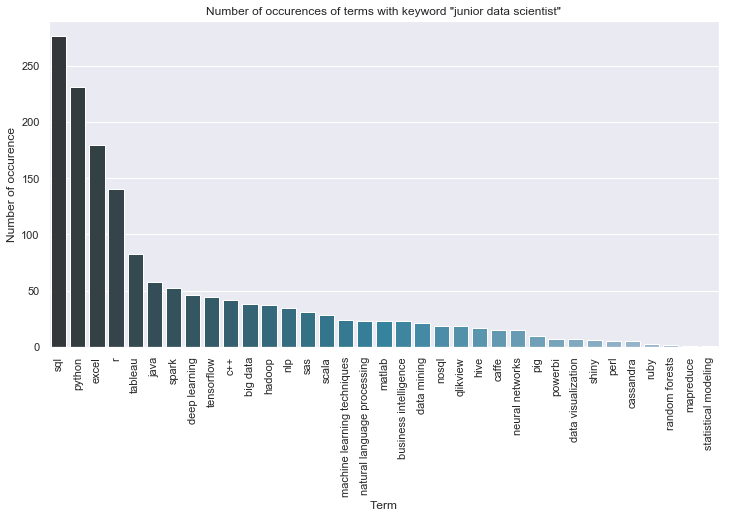

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

# We define a function in order to use it later
def plot_count(df, title):
    columns = results.columns[5:]
    counts = df.loc[:, columns] # We only need the term occurence columns from the whole dataframe
    counts = pd.DataFrame(counts.sum()) # Create a dataframe from the returned MultiIndex object
    counts = counts.sort_values(by=[0], ascending=False).reset_index() # Sort rows by number of occurences
    counts = counts.drop(counts[counts[0]==0].index) # Remove rows with 0 occurences

    # Creating graph
    fig = plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.xticks(rotation = 90)

    sns.set(style="darkgrid")
    sns.set_palette("PuBuGn_d")

    sns.barplot(x=counts['index'], y=counts[0], palette="PuBuGn_d")

    plt.xlabel('Term')
    plt.ylabel('Number of occurence')
    

plot_count(results, 'Number of occurences of terms with keyword "junior data scientist"')


SQL, Python and Excel are the most redondant terms, and thus are important skills to acquire in order to apply for Junior data scientist positions in London. About 36% of jobs mention 'SQL' in their job ads, 30% mention 'Python' and 25% mention 'Excel', which are the most frequent words among our search terms.

### Terms closeness

Another question one might ask is: Does some terms appear together more often in job ads than others?
The following code computes for each term the number of times it goes together with any other term. We can then construct a closeness matrix that shows the relationships betweens all the terms.

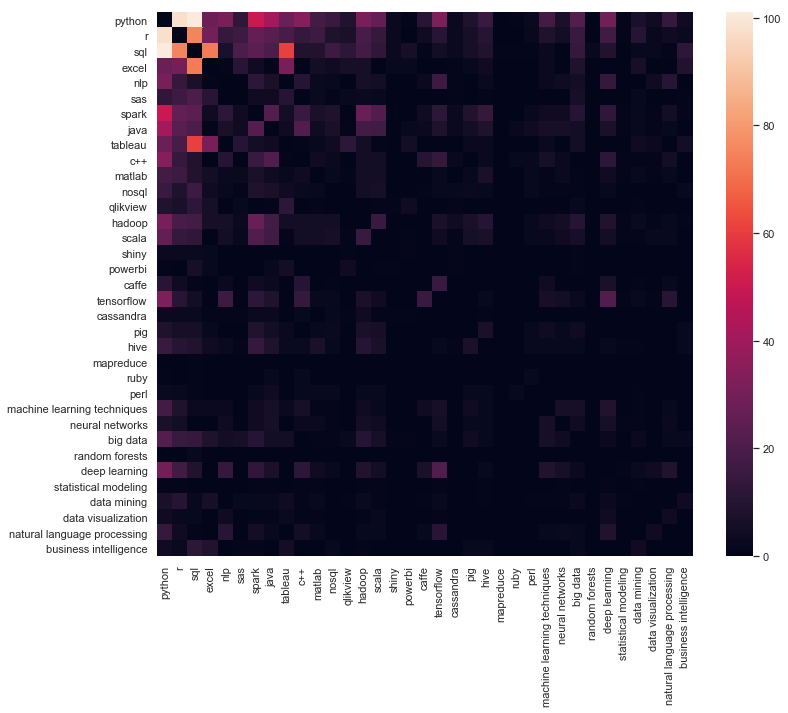

In [558]:
import numpy as np

columns = results.columns[5:] # Keep only the terms of expressions columns
col_id = 0
total = []
for col1 in columns: 
    added_row = [0] * len(columns) # Each term starts with a closeness row with only 0's
    for row in results.loc[:, columns].iterrows(): # for all rows of the results Dataframe we look for matches
        if not row[1][col_id] == 0: # if the current row doesn't contain the term we track matches for, then there is no match
            for col2 in range(len(columns)):
                if columns[col2] == col1: # we don't count auto-matches
                    pass
                elif row[1][col2] == 1: # add 1 to the total if there is a match
                    added_row[col2] += 1
    total.append(added_row)
    col_id += 1

fig = plt.figure(figsize=(12, 10))

# Put resulting list of lists into Dataframe
array = pd.DataFrame(total) 

# Add rows and column term labels
array.columns = columns
array.set_index(columns, inplace=True)

# Remove rows and columns full of 0's
mask = np.all(np.equal(array, 0), axis=1)
array = array[~mask]
array = array.loc[:, ~mask]

sns.heatmap(array)

### Filtration Analyst Scientist Other

One of the issues of searching a large number of ads with the same keyword is that ads tend to be less relevant to our original search as the page number increases. Taking into account irrelevant ads can bias the counts of the terms. 

To prevent this from happening, we can filtrate job ads by title and only keep those containing certain words. For the ```junior data scientist``` keyword, it turns out that two terms comes up frequently in the ads titles: ```data analyst``` and ```data scientist```. Plotting the results by making the distinction between the two can lead to some insights.

Let's start by getting the data for each category

In [559]:
mask = [i for i in range(len(results)) if 'data analyst' in results.loc[i, 'name'].lower()]
junior_data_analyst = results.loc[mask, :]
mask = [i for i in range(len(results)) if 'scientist' in results.loc[i, 'name'].lower()]
junior_data_scientist = results.loc[mask, :]

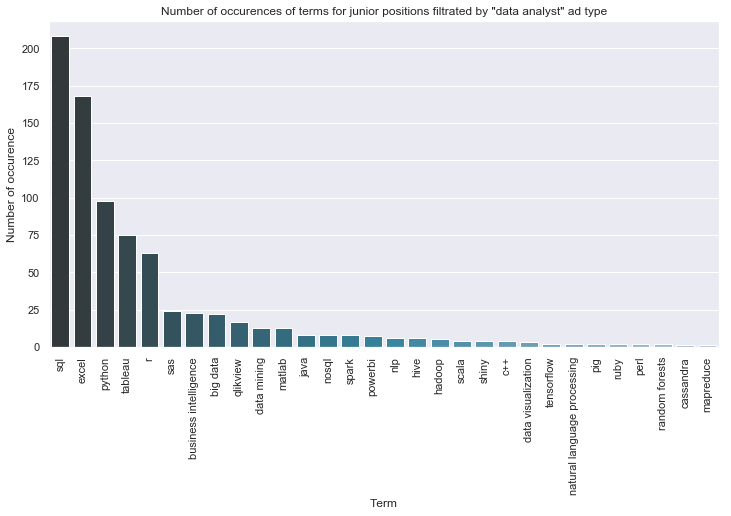

In [565]:
plot_count(junior_data_analyst, 'Number of occurences of terms for junior positions filtrated by "data analyst" ad type')

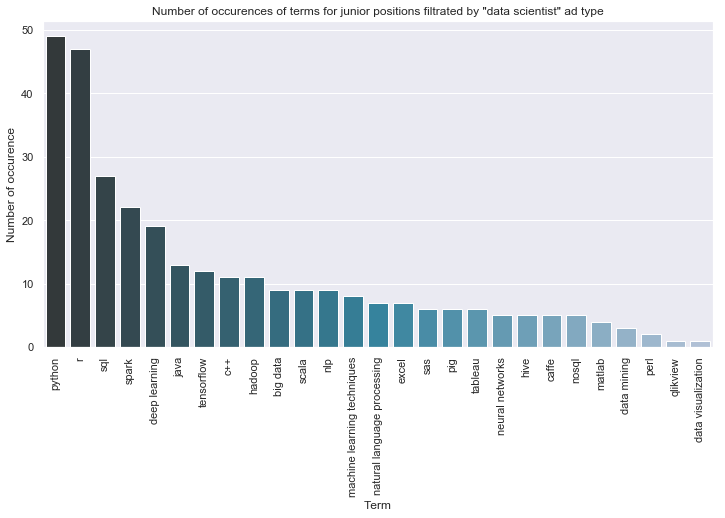

In [566]:
plot_count(junior_data_scientist, 'Number of occurences of terms for junior positions filtrated by "data scientist" ad type')

There are some differences between these two types of ads, and we can see that 'data scientist' positions tend to ask for more skills in big data and machine learning, as there are numerous occurences of terms like 'Spark' or 'Hadoop', 'Deep learning'.

The 'data analyst' positions however focuses more on data visualization, with numerous occurences of 'Tableau', 'Business intelligence' or 'Excel'.

### Difference between junior and regular data scientist jobs

How does required skills vary with experience ? We can answer that question by comparing the results of words count with the query keywords ```junior data scientist``` and ```data scientist```. For simplicity, the results of the jobs parse for keyword ```data scientist``` have been stored inside the file ```data_scientist_df.txt```.

In order to plot both "junior" and "regular" data science positions on a single barplot, some data reformatting in necessary:

In [645]:
results_data_scientist = pd.read_csv('data_scientist_df.txt')
results_junior_data_scientist = results

columns = results.columns[5:]
results_data_scientist.loc[:, columns]
results_junior_data_scientist.loc[:, columns]

types = ['regular', 'junior']
total = pd.DataFrame(columns=['type', 'term', 'count'])

for i, df in enumerate([results_data_scientist, results_junior_data_scientist]):
    type_ = types[i]
    for col in columns:
        temp = df.loc[:, col]
        temp = temp[temp == 1]
        count = len(temp)
        row = pd.DataFrame([[type_, col, count]], columns=['type', 'term', 'count'])
        total = pd.concat([total, row], axis=0)
total = total.sort_values(by=['count'], ascending=False)

In [649]:
total.head()

,type,term,count
0,regular,python,445
0,regular,r,308
0,regular,sql,276
0,junior,sql,276
0,junior,python,231


Now the data have been classed into three columns: ```type```, ```term``` and ```count```. We can use seaborn to plot the counts for each category

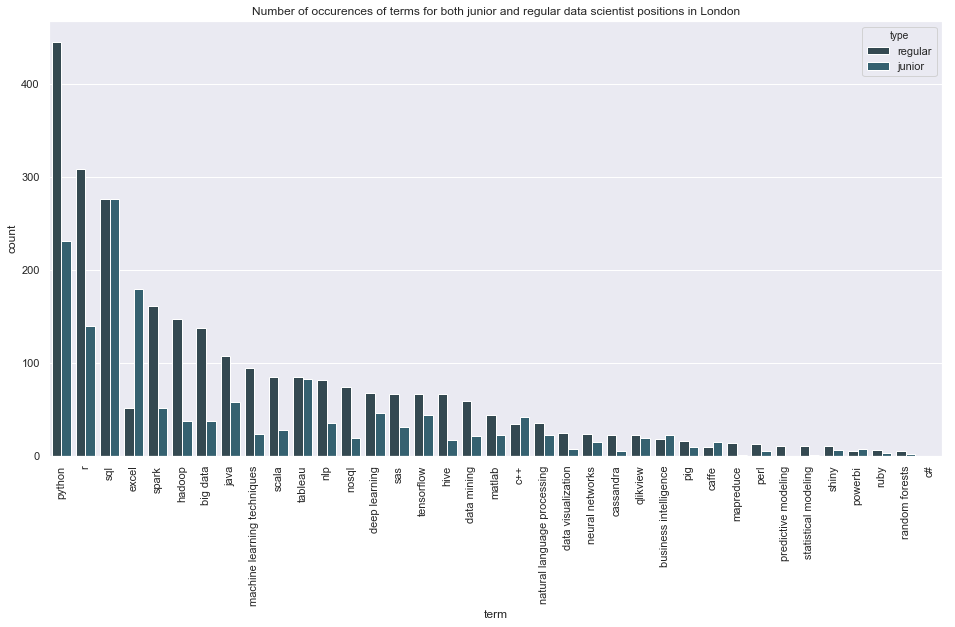

In [646]:
fig = plt.figure(figsize=(16, 8))
plt.title('Number of occurences of terms for both junior and regular data scientist positions in London')
plt.xlabel('Term')
plt.ylabel('Number of occurence')
plt.xticks(rotation=90)
sns.barplot(data=total, x='term', y='count', hue='type')

# Conclusion

This web scraping tasks lead to useful insights about the kind of skills recruiters ask for a given job area. In this notebook, we presented a quite simplistic approach to parsing the job ads by taking into account the occurence of terms in ads, starting from a fixed and predetermined terms search list. By doing so, can't find occurences of words we would not be expecting, and adding this functionnality would be a great improvement. 